In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in the csv file
employment=pd.read_csv('employment.csv')

In [3]:
# drop unecessary columns
employment.drop(columns=['12-month percent change in employment', '12-month net change in employment (thousands)'], inplace=True)

In [4]:
# function to standardize the values of the total employment column
def standardize(s):
    if ',' in s:
        s=s.replace(',', '')
    s=float(s)*1000
    return s

In [5]:
# rename the column
employment.rename(columns={'Total employment (thousands)': 'Total employment'}, inplace=True)

In [6]:
# apply the standardize function to the entire column
employment['Total employment']=employment['Total employment'].apply(standardize)

<AxesSubplot:ylabel='Total employment'>

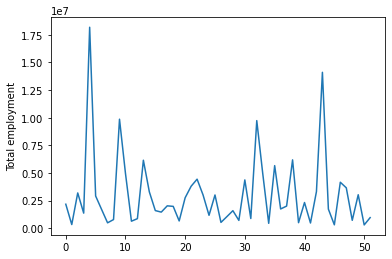

In [7]:
# lineplot of total employment by state index
sns.lineplot(x=employment.index, y='Total employment', data=employment)

<AxesSubplot:ylabel='Total employment'>

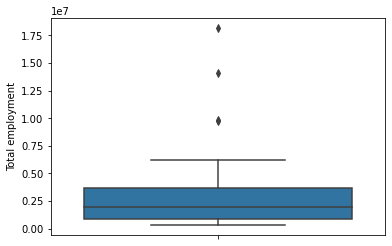

In [8]:
# boxplot of the total employment
sns.boxplot(y='Total employment', data=employment)

In [9]:
# Find the outliers of the total employment dataset
def outlier(data):
    outlier=[]
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    upper_bound = np.percentile(data, 75) + 1.5 * IQR
    lower_bound = np.percentile(data, 25) - 1.5 * IQR
    for i in data:
        if i>upper_bound:
            outlier.append(i)
        if i<lower_bound:
            outlier.append(i)
    return outlier
outliers = outlier(employment['Total employment'])
outliers

[18180700.0, 9860700.0, 9732900.0, 14103300.0]

In [10]:
# Find the states corrsponding to these outliers
employment_outlier = employment.loc[employment['Total employment'].isin(outliers)]

In [11]:
# read in the CSV file of the population by states dataset
population=pd.read_csv('US population by states.csv')

In [12]:
# Function to standardize the States column
def remove(s):
    if '.' in s:
        s=s.replace('.','')
    return s
population['States']=population['States'].apply(remove)

In [13]:
# function to standardize the numerical columns
def standardize2(s):
    if ',' in s:
        s=s.replace(',','')
    s=float(s)
    return s
population['2020 Estimate Base']=population['2020 Estimate Base'].apply(standardize2)
population['2020']=population['2020'].apply(standardize2)
population['2021']=population['2021'].apply(standardize2)
population['2022']=population['2022'].apply(standardize2)
population['2023']=population['2023'].apply(standardize2)

In [14]:
# Create a new dataframe containing the data of the employment rate by states
employment_rate=pd.DataFrame()
employment_rate['State']=employment['State']
employment_rate['Employment rate']=employment['Total employment']/population['2023']

<AxesSubplot:xlabel='Employment rate', ylabel='Count'>

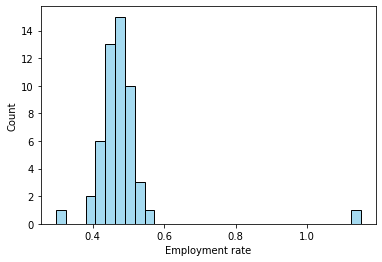

In [15]:
# histogram of the employment rate by states
sns.histplot(employment_rate['Employment rate'], color='skyblue')

<AxesSubplot:ylabel='Employment rate'>

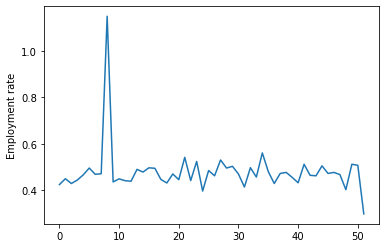

In [16]:
# line plot of the employment rate by states
sns.lineplot(x=employment_rate.index, y='Employment rate', data=employment_rate)

In [18]:
# Find the state with abnormal employment rate
abnormal = employment_rate.loc[employment_rate['Employment rate']>1]